In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Load Data

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv", index_col=0)
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
len(train_df)

891

## Explore Data

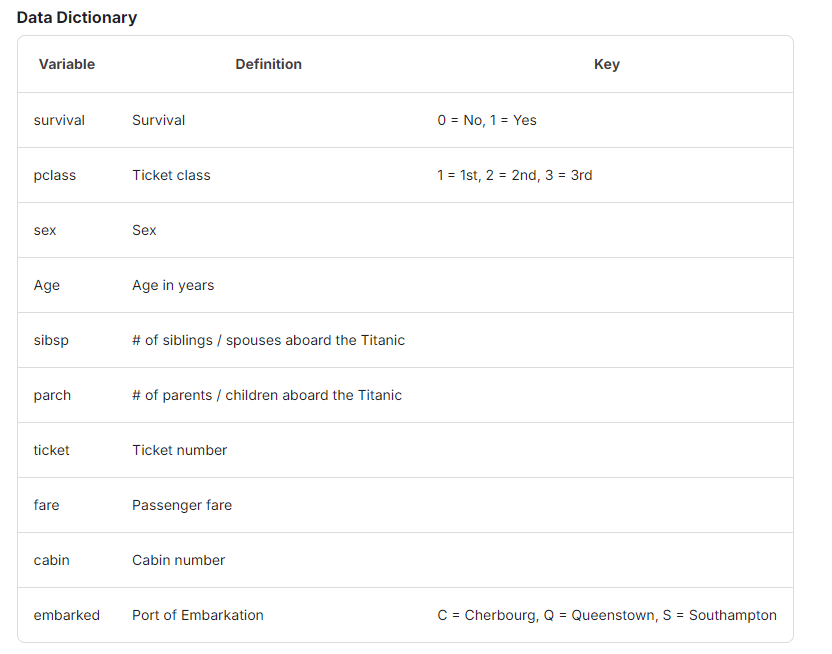

In [4]:
len(train_df)

891

In [5]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# cabin has 687 nulls, i dont think we can learn anything using it though

In [8]:
# lets check balance now
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
class_percentages = train_df["Survived"].value_counts(normalize=True) * 100

print(class_percentages)

threshold = 70  # Adjust this as needed
is_balanced = all(class_percentages < threshold)

if is_balanced:
    print("The dataset is balanced.")
else:
    print("The dataset is imbalanced.")

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64
The dataset is balanced.


In [10]:
# so model can easily get 61% accuracy if it always predics 0
# so this will be our basepoint

In [11]:
# check outliers
# Identify outliers for each column
for column in train_df.select_dtypes(include=[np.number]):  # Only numerical columns
    Q1 = train_df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = train_df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Column: {column}")
    print(f"Outliers: {len(train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)][column].tolist())}")

Column: Survived
Outliers: 0


Column: Pclass
Outliers: 0


Column: Age
Outliers: 11


Column: SibSp

Outliers: 46


Column: Parch
Outliers: 213


Column: Fare
Outliers: 116


## Create Dataset Class

/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


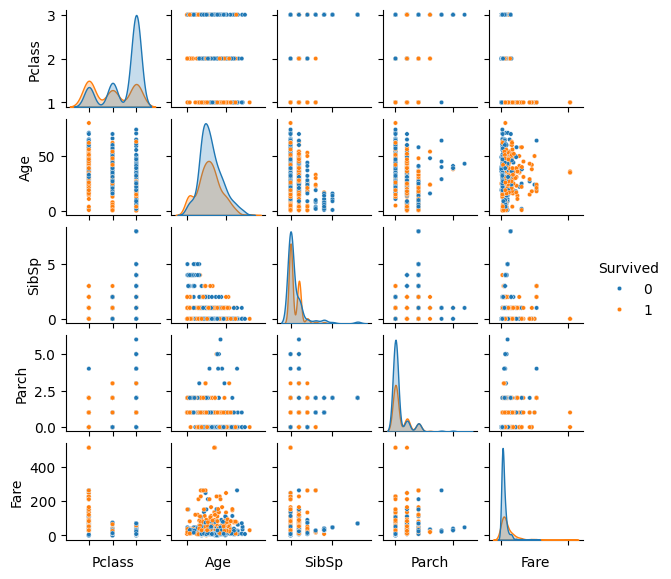

In [12]:
g = sns.pairplot(data=train_df, hue='Survived',
                 size=1.2, diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

<Axes: xlabel='Sex', ylabel='count'>

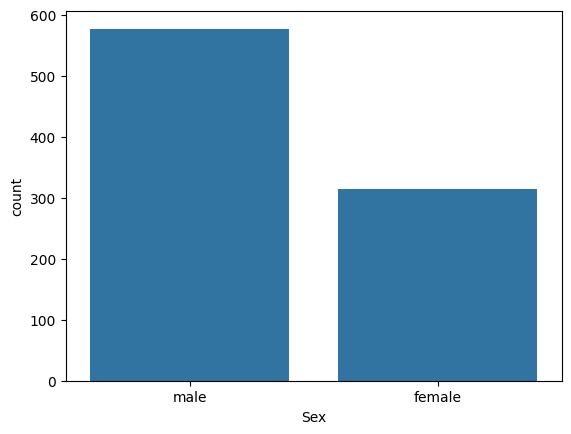

In [13]:
sns.countplot(x='Sex', data=train_df)

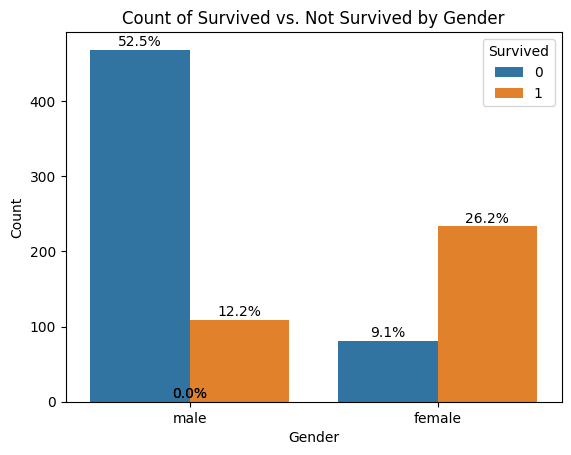

In [14]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

total = len(train_df)

# Add percentage annotations

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()  # Get position of each bar
    percentage = height / total * 100
    plt.text(x + width / 2, y + height + 5, f'{percentage:.1f}%', ha='center')

plt.title('Count of Survived vs. Not Survived by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

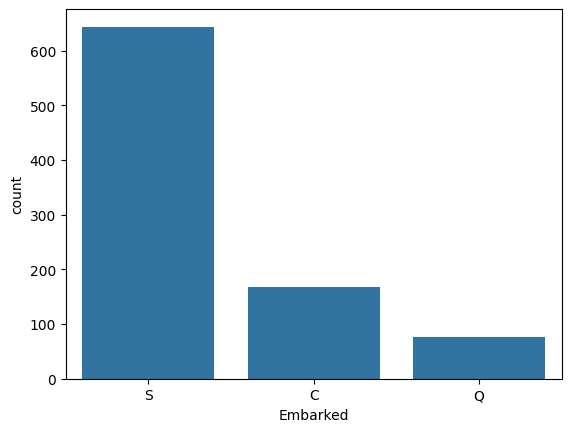

In [15]:
sns.countplot(x='Embarked', data=train_df)

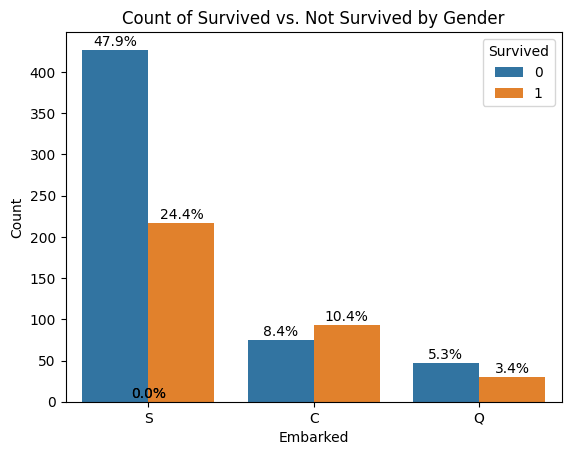

In [16]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)

total = len(train_df)

# Add percentage annotations

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()  # Get position of each bar
    percentage = height / total * 100
    plt.text(x + width / 2, y + height + 5, f'{percentage:.1f}%', ha='center')

plt.title('Count of Survived vs. Not Survived by Gender')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

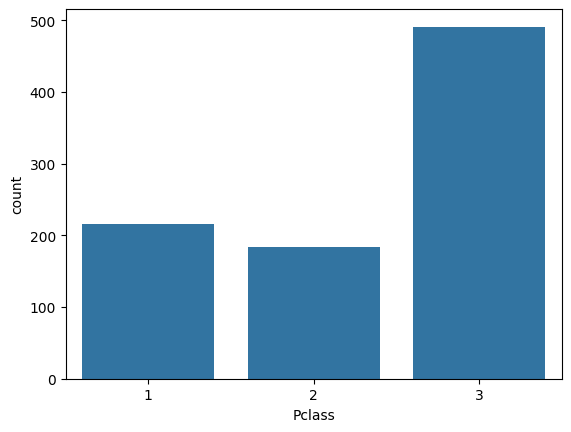

In [17]:
sns.countplot(x='Pclass', data=train_df)

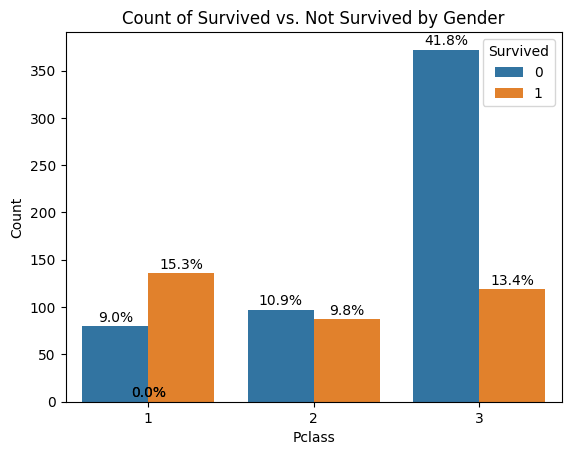

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

total = len(train_df)

# Add percentage annotations

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()  # Get position of each bar
    percentage = height / total * 100
    plt.text(x + width / 2, y + height + 5, f'{percentage:.1f}%', ha='center')

plt.title('Count of Survived vs. Not Survived by Gender')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

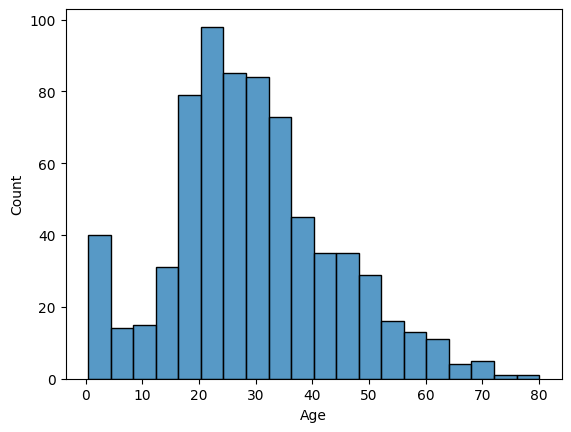

In [19]:
sns.histplot(x='Age', data=train_df)

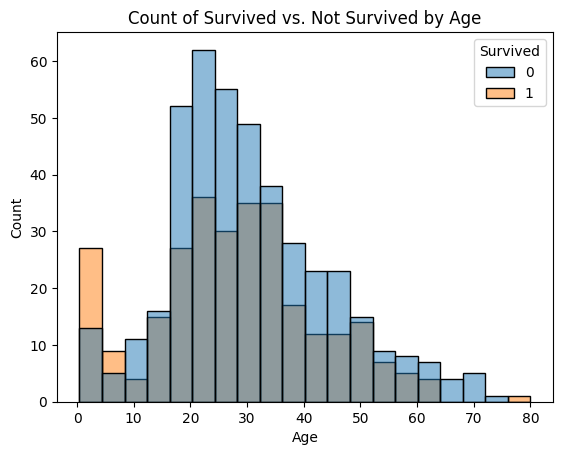

In [20]:
sns.histplot(x='Age', hue='Survived', data=train_df)
plt.title('Count of Survived vs. Not Survived by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='SibSp', ylabel='Count'>

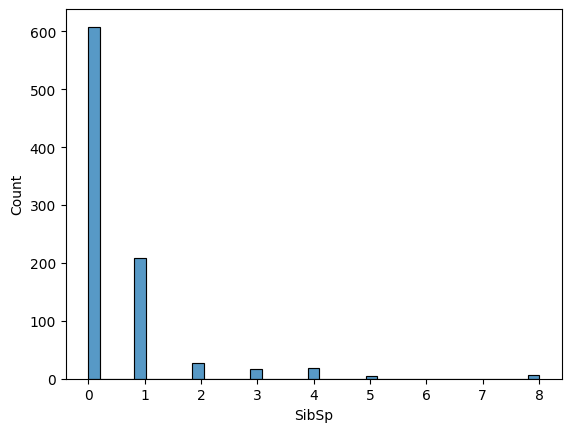

In [21]:
sns.histplot(x='SibSp', data=train_df)

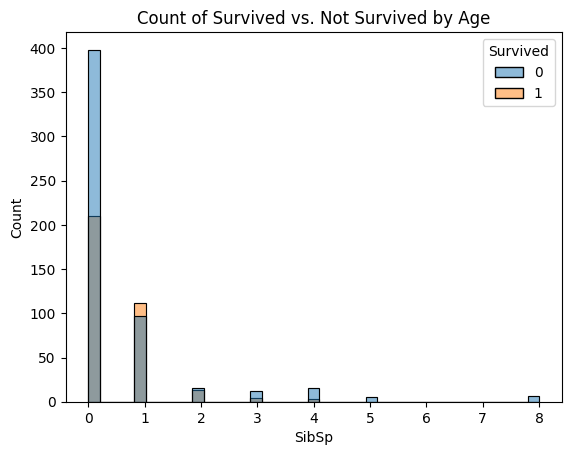

In [22]:
sns.histplot(x='SibSp', hue='Survived', data=train_df)
plt.title('Count of Survived vs. Not Survived by Age')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Parch', ylabel='Count'>

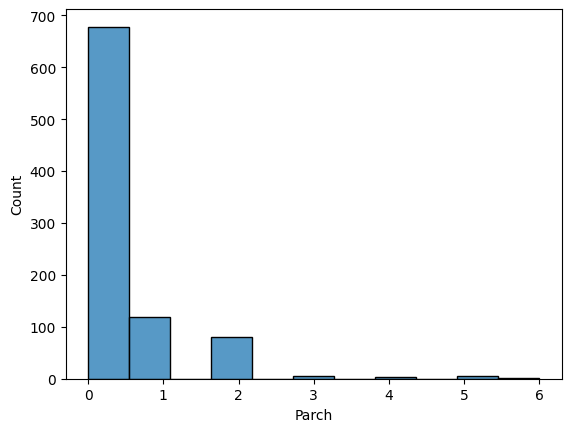

In [23]:
sns.histplot(x='Parch', data=train_df)

<Axes: xlabel='Parch', ylabel='Count'>

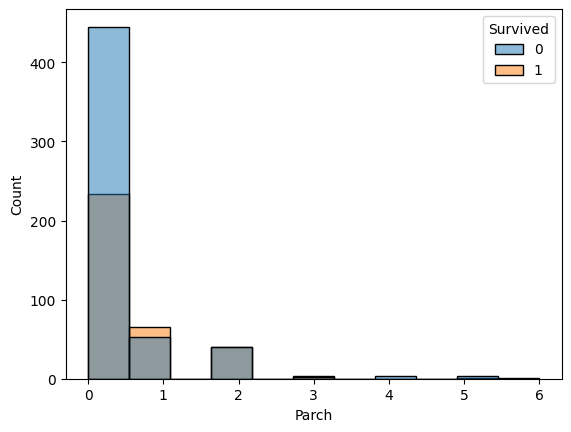

In [24]:
sns.histplot(x='Parch', hue="Survived", data=train_df)

<Axes: xlabel='Fare', ylabel='Count'>

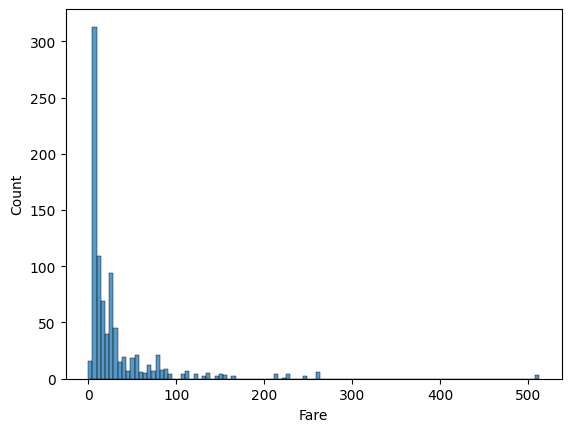

In [25]:
sns.histplot(x='Fare', data=train_df)

<Axes: xlabel='Fare', ylabel='Count'>

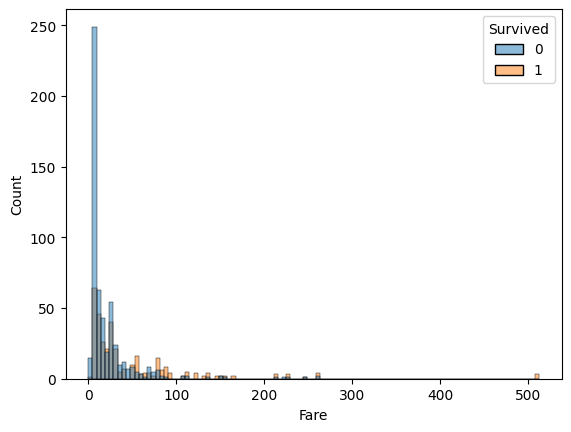

In [26]:
sns.histplot(x='Fare', hue="Survived", data=train_df)

In [27]:
train_df["Family_Name"] = train_df['Name'].str.split(',', expand=True)[0]

<Axes: xlabel='Family_Name', ylabel='Count'>

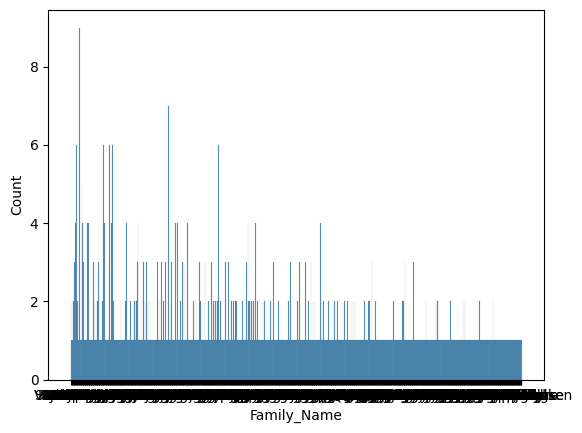

In [28]:
sns.histplot(x='Family_Name', data=train_df)

In [29]:
train_df['Name_Title'] = train_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (train_df['Name_Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
train_df['Name_Title'] = train_df['Name_Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

<Axes: xlabel='Name_Title', ylabel='Count'>

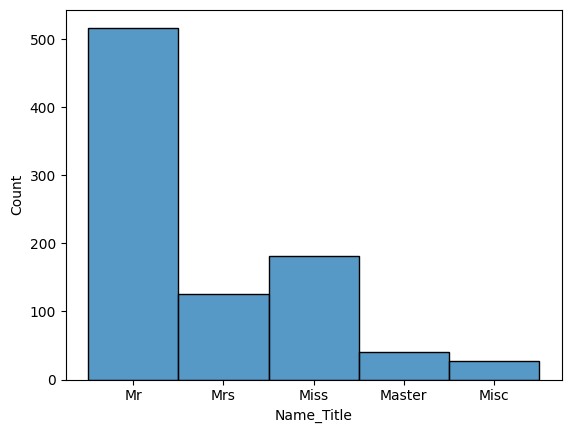

In [30]:
sns.histplot(x='Name_Title', data=train_df)

<Axes: xlabel='Name_Title', ylabel='Count'>

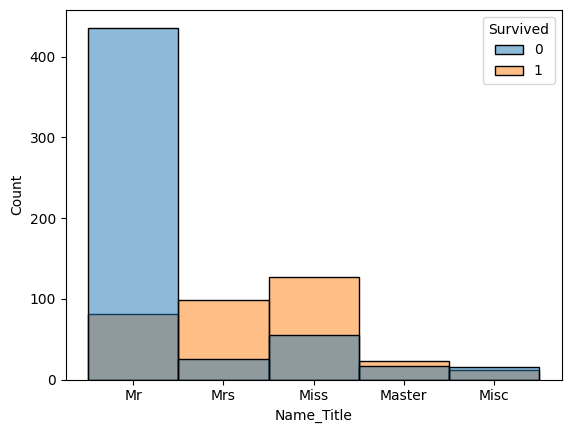

In [31]:
sns.histplot(x='Name_Title', hue="Survived", data=train_df)

In [32]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torch.nn as nn 
from torch.utils.data import random_split
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [33]:
torch.manual_seed(42); # seed rng for reproducibility

In [34]:
class CSVDataset(Dataset):
    def __init__(self, csv_path, features_col_list, target_col_list, transform=None, entire_data_transform=None, isTest=False):
        # data loading
        self.target_col_list = []
        self.data = pd.read_csv(csv_path, index_col=0)
        
        if (isTest):
            self.data[target_col_list[0]] = 1
        
        self.transform = transform

        self.data = entire_data_transform(self.data)

        self.features_col_list = []
        for col_name in self.data.columns:
            for feature_name in features_col_list:
                if feature_name in col_name:
                    # col is one hot encoded
                    self.features_col_list.append(col_name)

            for feature_name in target_col_list:
                if feature_name in col_name:
                    # col is one hot encoded
                    self.target_col_list.append(col_name)


    def __getitem__(self, index):
        x = self.data.iloc[index][self.features_col_list]  # Features}
        y = self.data.iloc[index][self.target_col_list]  # Target

        # Apply transformations if specified
        if self.transform:
            x, y = self.transform((x,y))

        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        # allow us to use len(dataset)
        return len(self.data)

In [35]:
class PreprocessCols():
    def __init__(self, col_funcs):
        self.col_funcs = col_funcs

    def __call__(self, dataset):
        for col_func in self.col_funcs:
            if (col_func["col"]=="."):
                col_func["func"](dataset)
                continue

            if ("new_col_name" in col_func.keys()):
                dataset[col_func["new_col_name"]] = dataset[col_func["col"]].apply(col_func["func"])
            else:
                dataset[col_func["col"]] = dataset[col_func["col"]].apply(col_func["func"])
                
        return dataset

class OneHotEncode():
    def __init__(self, cat_cols):
        self.encoder = ColumnTransformer(
            transformers=[
                ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)
            ],
            remainder='passthrough'
        )
        self.isFit = False
    
    def __call__(self, dataset):        
        if (self.isFit==False):
            self.isFit = True
            self.encoder.fit(dataset)
            
        encoded_dataset = self.encoder.transform(dataset)
        return pd.DataFrame(encoded_dataset, columns=self.encoder.get_feature_names_out())
        
class FillNa():
    def __init__(self, col_na_fill_rule):
        self.col_na_fill_rule = col_na_fill_rule

    def __call__(self, dataset):
        for col, na_fill in self.col_na_fill_rule.items():
            dataset[col].fillna(na_fill, inplace=True)

        return dataset

class NormalizeCol():
    def __init__(self, cols_min_max_val):
        self.cols_min_max_val = cols_min_max_val
    
    def __call__(self, sample):
        inputs, targets = sample

        for col in self.cols_min_max_val:
            inputs[col] = (inputs[col] - self.cols_min_max_val[col]["minVal"]) / (self.cols_min_max_val[col]["maxVal"] - self.cols_min_max_val[col]["minVal"])
        
        return (inputs, targets)

class ConvertNumpyArrToFloat32Tensor():
    def __call__(self, sample):
        inputs, targets = sample
        inputs = (inputs.values).astype(np.float32)
        targets = (targets.values).astype(np.float32)
        return (inputs, targets)

In [36]:
csv_file = "/kaggle/input/titanic/train.csv"
features_col_list = ["Embarked", "Sex", "Pclass", "Age", "SibSp", "Parch", "Fare", "Name_Title"]
target_col_list = ["Survived"]

cat_cols = ["Embarked", "Sex", "Pclass", "Name_Title"]
fill_na = {"Embarked": "S", "Age": train_df["Age"].median()} 
normalize_cols = {"remainder__Age": {"minVal": 0, "maxVal": 150}, "remainder__SibSp": {"minVal": 0, "maxVal": 50}, "remainder__Parch": {"minVal": 0, "maxVal": 50}, "remainder__Fare": {"minVal": 0, "maxVal": 600}}    

def createNameTitle(dataset):
    dataset['Name_Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    #cleanup rare title names
    #print(data1['Title'].value_counts())
    stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
    title_names = (dataset['Name_Title'].value_counts() < stat_min) #this will create a true false series with title name as index
    
    #apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    dataset['Name_Title'] = dataset['Name_Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

    return dataset
    
preprocess_col = [{"col": ".", "func": createNameTitle, "new_col_name": "."}]

transforms = torchvision.transforms.Compose([NormalizeCol(normalize_cols),
                                             ConvertNumpyArrToFloat32Tensor()])
one_hot_encode_transform = OneHotEncode(cat_cols)
entire_data_transform = torchvision.transforms.Compose([FillNa(fill_na), PreprocessCols(preprocess_col), one_hot_encode_transform])

dataset = CSVDataset(csv_file, features_col_list, target_col_list, transform=transforms, entire_data_transform=entire_data_transform)
dataset[0]

/tmp/ipykernel_74/2348786235.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(na_fill, inplace=True)


(tensor([0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.1467, 0.0200, 0.0000, 0.0121]),
 tensor([0.]))

In [37]:
len(dataset)

891

In [38]:
# Define split ratios
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = int(0.1 * len(dataset))    # 10% for validation
test_size = len(dataset) - train_size - val_size  # Remaining for testing

# Split dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [39]:
# Define batch size
# since we have less data
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [41]:
debug = True

input_dim = len(next(iter(train_loader))[0][0])
hidden_neuron = 256
output_dim = len(next(iter(train_loader))[1][0])

class LinearLayer(nn.Linear):
    def __init__(self, *args, **kwargs):
        # Call the parent constructor to initialize the Linear layer
        super().__init__(*args, **kwargs)
        
    def forward(self, x):
        self.output = super().forward(x)
        return self.output

class LeakyReluLayer(nn.LeakyReLU):
    def __init__(self, *args, **kwargs):
        # Call the parent constructor to initialize the Linear layer
        super().__init__(*args, **kwargs)
        
    def forward(self, x):
        self.output = super().forward(x)
        return self.output

class BatchNorm1dLayer(nn.BatchNorm1d):
    def __init__(self, *args, **kwargs):
        # Call the parent constructor to initialize the Linear layer
        super().__init__(*args, **kwargs)
        
    def forward(self, x):
        self.output = super().forward(x)
        return self.output

class DropoutLayer(nn.Dropout):
    def __init__(self, *args, **kwargs):
        # Call the parent constructor to initialize the Linear layer
        super().__init__(*args, **kwargs)
        
    def forward(self, x):
        self.output = super().forward(x)
        return self.output

class TitanicSurvivalPredictor(nn.Module):
    def __init__(self, hidden_neuron):
        super().__init__()

        # define layers
        self.layers = nn.ModuleList([
            LinearLayer(input_dim, 1024),
            BatchNorm1dLayer(1024),
            LeakyReluLayer(),
            DropoutLayer(0.3),
            
            LinearLayer(1024, 512),
            BatchNorm1dLayer(512),
            LeakyReluLayer(),
            DropoutLayer(0.3),
            
            LinearLayer(512, 256),
            BatchNorm1dLayer(256),
            LeakyReluLayer(),
            DropoutLayer(0.3),
            
            LinearLayer(256, 128),
            BatchNorm1dLayer(128),
            LeakyReluLayer(),
            DropoutLayer(0.3),
            
            LinearLayer(128, 64),
            BatchNorm1dLayer(64),
            LeakyReluLayer(),
            DropoutLayer(0.3),

            LinearLayer(64, 32),
            BatchNorm1dLayer(32),
            LeakyReluLayer(),
            DropoutLayer(0.3),

            LinearLayer(32, 16),
            BatchNorm1dLayer(16),
            LeakyReluLayer(),
            DropoutLayer(0.3),

            LinearLayer(16, 8),
            BatchNorm1dLayer(8),
            LeakyReluLayer(),
            DropoutLayer(0.3),
                        
            LinearLayer(8, output_dim),
        ])
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

model = TitanicSurvivalPredictor(hidden_neuron)

In [42]:
activation_layers = ["LeakyReluLayer"]

In [43]:
@torch.no_grad()
def initParam(model):
    # Initialize weights using Xavier Normal
    for i, layer in enumerate(model.layers):
        if (isinstance(layer, LinearLayer)):
            if (i<len(model.layers)-1):
                nn.init.xavier_normal_(model.layers[i].weight, gain=torch.nn.init.calculate_gain("leaky_relu"))
            else:
                nn.init.xavier_normal_(model.layers[i].weight, gain=torch.nn.init.calculate_gain("sigmoid"))
            if layer.bias is not None:
                nn.init.zeros_(model.layers[i].bias)

initParam(model)

In [44]:
init_loss = 0
model = model.to(device)
bce_loss = nn.BCEWithLogitsLoss()

with torch.no_grad():
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        pred = model(inputs)        
        loss = bce_loss(pred, labels)

        init_loss += loss.item()

init_loss /= len(train_loader)
print(f"init loss: {init_loss}")

init loss: 0.9235692076061083


In [45]:
# less lr rate since can overfit easily
learning_rate = 1e-3
# less epoch as can easily overfit
num_epoch = 100

lossi_train = []
lossi_val = []
metric_val = []
ud = [] # update to data ration

total_samples = len(train_dataset)
n_iter = math.ceil(total_samples / batch_size)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
bce_loss = nn.BCEWithLogitsLoss()
output_grads = []

model = model.to(device)

runFirstBatch = False
for epoch in range(num_epoch):
    # reset to train mode
    model.train()
    
    train_loss = 0    
    for i, (inputs, labels) in enumerate(train_loader):
        # reset grad
        optimizer.zero_grad()
        
        # forward pass
        # print(f"inputs: {inputs}")
        # print(f"labels: {labels}")
        inputs = inputs.to(device)
        labels = labels.to(device)

        # print(f"inputs device: {inputs.device}, labels device: {labels.device}, model device: {[param.device for param in model.parameters()]}")
        
        pred = model(inputs)
        # print(f"pred: {pred}")

        # calc loss
        loss = bce_loss(pred, labels)

        if (debug):
            for layer in model.layers:
                layer.output.retain_grad() # save gradients of non leaf tensors also
        
        # backward pass
        loss.backward()
        optimizer.step()
        loss = loss.log10()
        train_loss += loss.item()

    # copied it to array since running with no grad will set grad to None
    if (debug):
        curr_grads = {}
        for i, layer in enumerate(model.layers):
            curr_grads[f"{layer.__class__.__name__}: {i}"] = layer.output.grad.clone()

        output_grads.append(curr_grads)
    
    train_loss /= len(train_loader)
    lossi_train.append(train_loss)

    # validation phase
    model.eval()
    
    # Accuracy calculation
    correct = 0
    total = 0
    accuracy = 0
    val_loss = 0
    
    with torch.no_grad():  # Disable gradient computation for validation
        ud.append([((learning_rate*p.grad.std() / p.data.std()).log10().item() if p.ndim == 2 else 0) for p in model.parameters()])
        
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            pred = model(inputs)
            predictions = torch.sigmoid(pred)  # Apply sigmoid for binary classification
            predicted_classes = (predictions > 0.5).float()  # Convert to binary (0 or 1)
            correct += (predicted_classes == labels).sum().item()
            total += labels.size(0)
            
            loss = bce_loss(pred, labels)
            loss = loss.log10()
            val_loss += loss.item()
        
        accuracy = correct / total
        metric_val.append(accuracy)
        val_loss /= len(val_loader)
        lossi_val.append(val_loss)

    if ((epoch+1)%5==0):
        print(f"Epoch {epoch+1}/{num_epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f},  Val Metric: {accuracy:.4f}")

        # if (debug):
        #     break

Epoch 5/100, Train Loss: -0.1997, Val Loss: -0.3460,  Val Metric: 0.8427


Epoch 10/100, Train Loss: -0.2480, Val Loss: -0.4033,  Val Metric: 0.8539


Epoch 15/100, Train Loss: -0.2767, Val Loss: -0.4030,  Val Metric: 0.8652


Epoch 20/100, Train Loss: -0.3002, Val Loss: -0.4085,  Val Metric: 0.8652


Epoch 25/100, Train Loss: -0.3206, Val Loss: -0.4313,  Val Metric: 0.8652


Epoch 30/100, Train Loss: -0.3349, Val Loss: -0.4253,  Val Metric: 0.8764


Epoch 35/100, Train Loss: -0.3370, Val Loss: -0.4440,  Val Metric: 0.8764


Epoch 40/100, Train Loss: -0.3393, Val Loss: -0.4431,  Val Metric: 0.8652


Epoch 45/100, Train Loss: -0.3350, Val Loss: -0.4493,  Val Metric: 0.8764


Epoch 50/100, Train Loss: -0.3586, Val Loss: -0.4412,  Val Metric: 0.8652


Epoch 55/100, Train Loss: -0.3716, Val Loss: -0.4680,  Val Metric: 0.8764


Epoch 60/100, Train Loss: -0.3679, Val Loss: -0.4356,  Val Metric: 0.8764


Epoch 65/100, Train Loss: -0.3862, Val Loss: -0.4432,  Val Metric: 0.8764


Epoch 70/100, Train Loss: -0.3994, Val Loss: -0.4516,  Val Metric: 0.8764


Epoch 75/100, Train Loss: -0.4008, Val Loss: -0.4482,  Val Metric: 0.8652


Epoch 80/100, Train Loss: -0.3888, Val Loss: -0.4635,  Val Metric: 0.8764


Epoch 85/100, Train Loss: -0.4038, Val Loss: -0.4627,  Val Metric: 0.8652


Epoch 90/100, Train Loss: -0.3887, Val Loss: -0.4499,  Val Metric: 0.8652


Epoch 95/100, Train Loss: -0.4030, Val Loss: -0.4582,  Val Metric: 0.8764


Epoch 100/100, Train Loss: -0.4035, Val Loss: -0.4725,  Val Metric: 0.8764


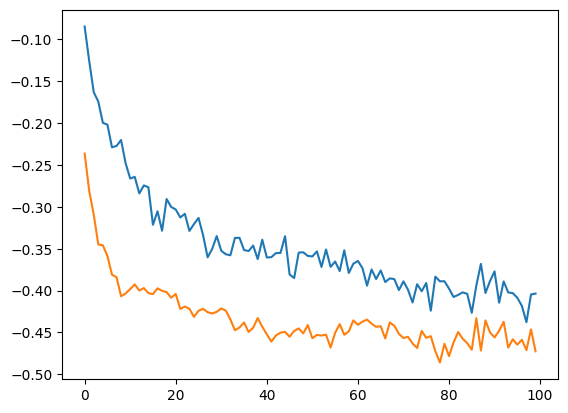

In [46]:
plt.plot(lossi_train)
plt.plot(lossi_val)

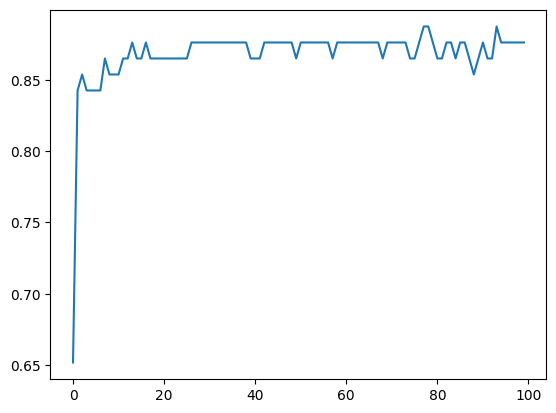

In [47]:
plt.plot(metric_val)

layer 2 (LeakyReluLayer): mean +0.37, std 0.54


layer 6 (LeakyReluLayer): mean +0.36, std 0.56


layer 10 (LeakyReluLayer): mean +0.33, std 0.56


layer 14 (LeakyReluLayer): mean +0.32, std 0.57


layer 18 (LeakyReluLayer): mean +0.33, std 0.59


layer 22 (LeakyReluLayer): mean +0.35, std 0.63


layer 26 (LeakyReluLayer): mean +0.34, std 0.64


layer 30 (LeakyReluLayer): mean +0.40, std 0.71


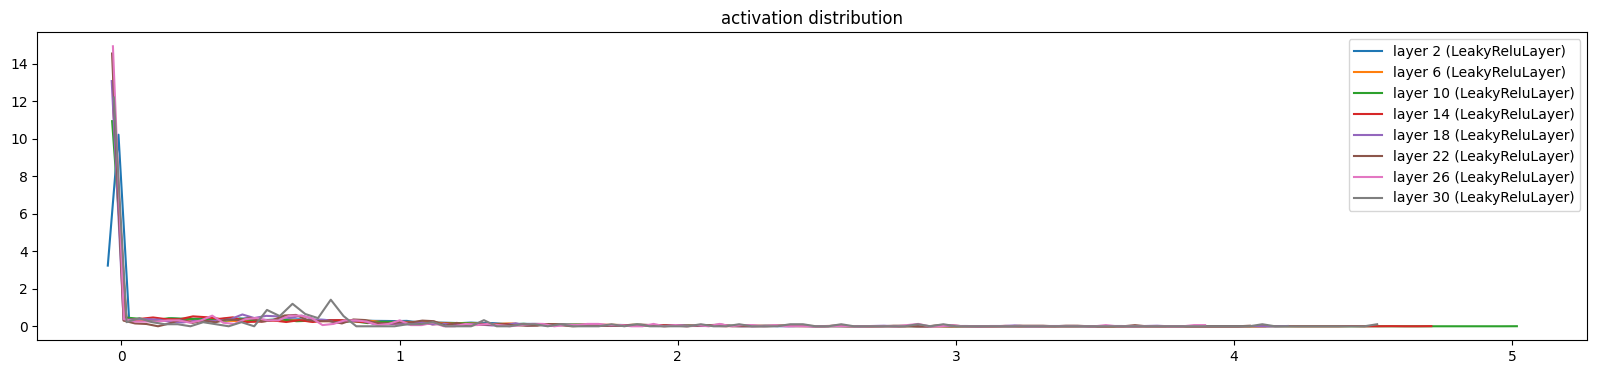

In [48]:
# visualize activations
plt.figure(figsize=(20, 4))
legends = []

if (len(model.layers) > 1):
    for i, layer in enumerate(model.layers): # exclude output layer
        layer_name = layer.__class__.__name__
        for activation_layer in activation_layers:
            if (activation_layer in layer_name):
                t = layer.output.cpu()
                print('layer %d (%10s): mean %+.2f, std %.2f' % (i, layer.__class__.__name__, t.mean(), t.std()))
                hy, hx = torch.histogram(t, density=True)
                plt.plot(hx[:-1].detach(), hy.detach())
                legends.append(f'layer {i} ({layer.__class__.__name__})')
    
    plt.legend(legends)
    plt.title("activation distribution")

layer (LeakyReluLayer: 2): mean -0.000001, std 3.462564e-04


layer (LeakyReluLayer: 6): mean -0.000004, std 6.653170e-04


layer (LeakyReluLayer: 10): mean +0.000021, std 1.217900e-03


layer (LeakyReluLayer: 14): mean +0.000003, std 2.155573e-03


layer (LeakyReluLayer: 18): mean +0.000040, std 2.223253e-03

layer (LeakyReluLayer: 22): mean +0.000162, std 3.859096e-03


layer (LeakyReluLayer: 26): mean +0.000791, std 1.184272e-02


layer (LeakyReluLayer: 30): mean +0.001100, std 1.932551e-02


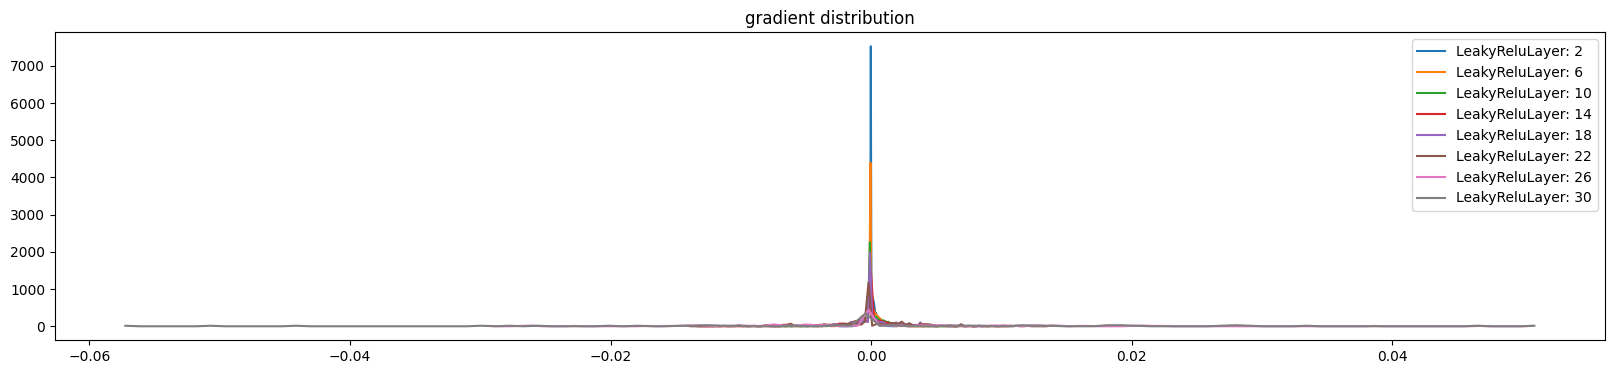

In [49]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []

if (len(model.layers) > 1):
    for layer_name, layer_grad in output_grads[-1].items(): # note: exclude the output
        for activation_layer in activation_layers:
            if (activation_layer in layer_name):
                t = layer_grad.cpu()
                print('layer (%10s): mean %+f, std %e' % (layer_name, t.mean(), t.std()))
                hy, hx = torch.histogram(t, density=True)
                plt.plot(hx[:-1].detach(), hy.detach())
                legends.append(f'{layer_name}')
    
        plt.legend(legends);
        plt.title('gradient distribution')

weight (1024, 17) | mean +0.000007 | std 3.990240e-03 | grad:data ratio 5.189342e-02


weight (512, 1024) | mean +0.000004 | std 3.650079e-04 | grad:data ratio 6.776279e-03


weight (256, 512) | mean +0.000002 | std 8.779796e-04 | grad:data ratio 1.177361e-02


weight (128, 256) | mean +0.000028 | std 1.727609e-03 | grad:data ratio 1.676621e-02


weight  (64, 128) | mean +0.000049 | std 2.457824e-03 | grad:data ratio 1.693965e-02


weight   (32, 64) | mean +0.000102 | std 2.996012e-03 | grad:data ratio 1.534553e-02


weight   (16, 32) | mean +0.000039 | std 4.125688e-03 | grad:data ratio 1.443219e-02


weight    (8, 16) | mean -0.002598 | std 1.742028e-02 | grad:data ratio 4.991756e-02


weight     (1, 8) | mean +0.031611 | std 4.877025e-02 | grad:data ratio 6.470490e-02


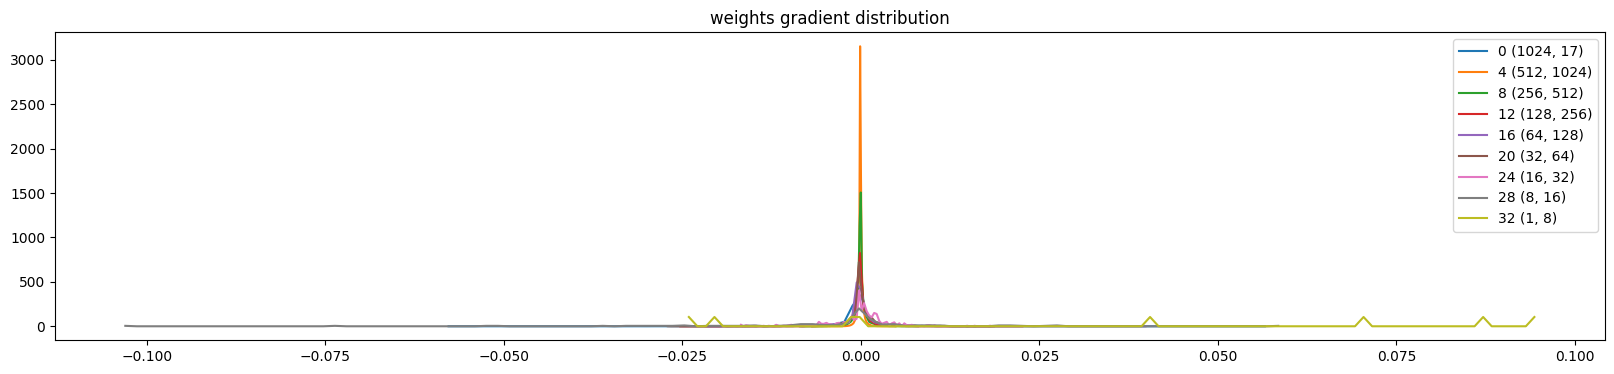

In [50]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i,p in enumerate(model.parameters()):
  if p.ndim == 2: # limit to weights only
    t = p.grad.cpu()
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution');

# gradient to data ratio should be less

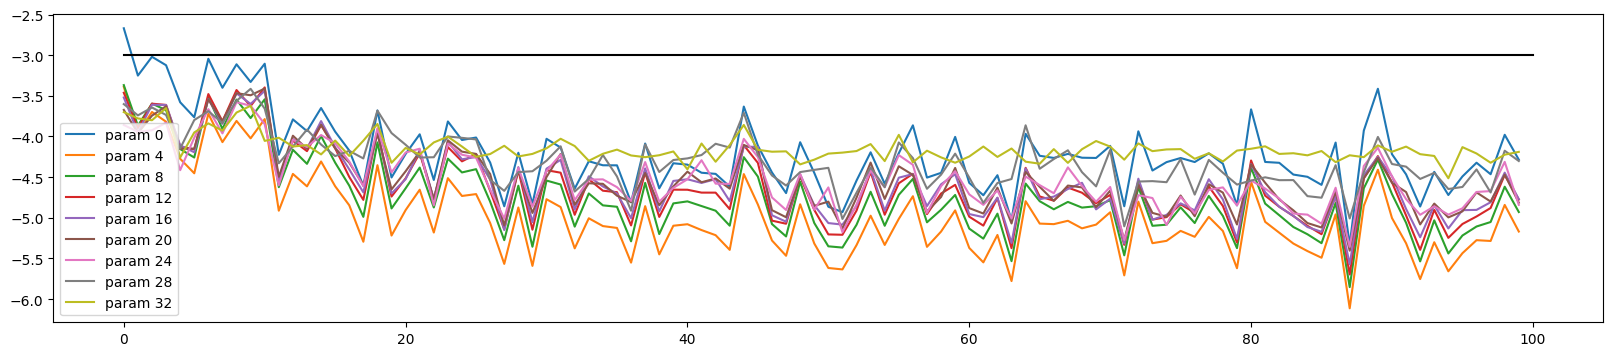

In [51]:
# plot update to data ratio
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(model.parameters()):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
# less than 1e-3 means learning to slow
plt.legend(legends);

In [52]:
model.eval()  # Set model to evaluation mode

# Accuracy calculation
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model(inputs)
        predictions = torch.sigmoid(outputs)  # Apply sigmoid for binary classification
        predicted_classes = (predictions > 0.5).float()  # Convert to binary (0 or 1)
        correct += (predicted_classes == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 80.00%


In [53]:
model.eval()  # Set model to evaluation mode

# Accuracy calculation
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model(inputs)
        predictions = torch.sigmoid(outputs)  # Apply sigmoid for binary classification
        predicted_classes = (predictions > 0.5).float()  # Convert to binary (0 or 1)
        correct += (predicted_classes == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Train Accuracy: {accuracy * 100:.2f}%")

Train Accuracy: 83.29%


## Test

In [54]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [55]:
len(test_df)

418

In [56]:
csv_file = "/kaggle/input/titanic/test.csv"
target_col_list = ["Survived"]

transforms = torchvision.transforms.Compose([NormalizeCol(normalize_cols),
                                             ConvertNumpyArrToFloat32Tensor()])

entire_data_transform = torchvision.transforms.Compose([FillNa(fill_na), PreprocessCols(preprocess_col), one_hot_encode_transform])

final_test_dataset = CSVDataset(csv_file, features_col_list, target_col_list, transform=transforms, entire_data_transform=entire_data_transform, isTest=True)
final_test_dataset[0]

/tmp/ipykernel_74/2348786235.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(na_fill, inplace=True)


(tensor([0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.0000, 0.2300, 0.0000, 0.0000, 0.0130]),
 tensor([1.]))

In [57]:
len(final_test_dataset)

418

In [58]:
final_test_loader = DataLoader(final_test_dataset, shuffle=False)

pred = []
with torch.no_grad():  # Disable gradient calculation
    for inputs, labels in final_test_loader:
        inputs = inputs.to(device)
    
        outputs = model(inputs)
        predictions = torch.sigmoid(outputs)  # Apply sigmoid for binary classification
        predicted_classes = (predictions > 0.5).float()  # Convert to binary (0 or 1)

        pred.append(int(predicted_classes.item()))

In [59]:
len(final_test_loader)

418

In [60]:
pred_df = pd.DataFrame(pred, columns=["Survived"])
pred_df["PassengerId"] = test_df["PassengerId"]
pred_df.to_csv("pred.csv", index=False)

In [61]:
pred_df.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896
